In [2]:
#importing libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 

In [3]:
#loading dataset
df=pd.read_csv('../data/BostonHousing.csv')
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
print("Columns")
print(df.columns)

Columns
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [6]:
target='medv'
columns=df.columns.drop(target)
for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [8]:
X = df.drop(columns='medv') # Features
y = df[target] # Target Variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

mean squared error:37.895369927535135
R^2 score:0.6659050900542383


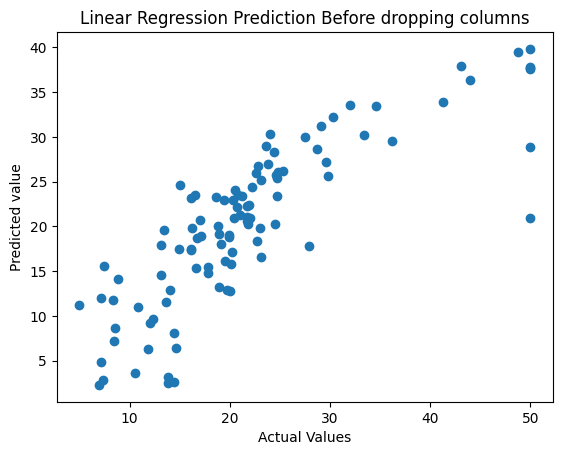

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean squared error:{mse}")
print(f"R^2 score:{r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted value")
plt.title("Linear Regression Prediction Before dropping columns")
plt.show()

In [14]:
df.drop(['b', 'lstat'], axis='columns', inplace=True)
X = df.drop(columns='medv') # Features
y = df['medv'] # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

mean squared error:47.02706594279505
R^2 score:0.5853978100434012


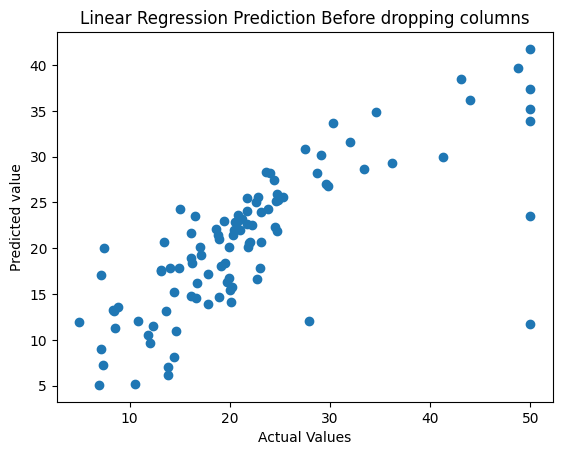

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean squared error:{mse}")
print(f"R^2 score:{r2}")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted value")
plt.title("Linear Regression Prediction Before dropping columns")
plt.show()